# Решение нелинейных уравнений (численное) Лекция 1

$f(x) = 0$

Степень == количество корней

Трансцендентные == e, log... -> колько угодно корней

## Методы:
1. точные
2. приближенные => редко

## 1. Локализация корней
Находим интервал изоляции корня

## 2. Уточнение до заданной точности
1. графический

Строим график, точка пересечения с OX - корень

2. аналитический

__Теорема__ - если $f(a) * f(b) < 0, sign(f`(x))=const$, то есть один корень

__Устойчивость__ - незначительные изменения исходных данных ведут к незначительным изменениям результатов

__Сходимость__ - решение задачи сходится к точному решению ($\lim_{n \rightarrow \infty}x_n = x*$)

__Скорость сходимости__ - чаще всего количество итераций (линейная, сверхлинейная, квадратичная)

## Метод половинного деления
Реализация ниже

Применяем для точного решения, довольно медленный

Если несколько корней выберется рандомный. Проверяем первую производную

## Метод хорд
1. Соединяем ab хордой, получим абсциссу ($x_0$)
2. Уточняем интервал

Рабочая математика $$\frac{(y-f(a)}{f(b)-f(a)}=\frac{x-a}{b-a}$$

$x_n=\frac{a_nf(b_n)}{}$

## Метод Ньютона (качательной)
1. Заменяем отрезок касательной
2. Пересечение с OX - $x_0$, очередное приближение

Математика: $$x_n=x_{n-1}-\frac{f(x_0)}{f`(x_0)}$$

### Условия:
1. Функция определена и непрерывна
2. __Теорема1__ выполняется
3. $sing(f`(x)), sign(f``(x)) == const$
4. $f`(x) \neq 0$
5. Первое приближение: $f(x)*f``(x)>0$

## Метод секущих
Математика: $$x_{i+1}=x_i-\frac{x_i - x_{i-1}}{f(x_i) - f(x_{i-1})}f(x_i)i$$

__ДЗ: метод простых итераций__

__Лаба: метод Ньютона и половинного__

In [1]:
def function(x):
    return (x**3) + (4.81 * x**2) - (17.37 * x) + 5.38

In [2]:
def validate(a, b):
    if function(a)*function(b) < 0:
        return True
    else: return False

In [3]:
# TODO: b-a<=eps; f`
def half(a, b, eps, i = 0):
    
    x_0 = (a + b)/2
    
    if a < 0 and b > 0:
        l = b + abs(a)
    elif a < 0 and b < 0:
        l = abs(a) - abs(b)
    else: l = b - a
    if abs(function(x_0)) <= eps:
        return [x_0, function(x_0), i]   
    i += 1
    if validate(a, x_0):
        return half(a, x_0, eps, i)
    else:
        return half(x_0, b, eps, i)        
        

In [6]:
print('Введите a:')
a = float(input())
print('Введите b:')
b = float(input())
print('Введите eps:')
eps = float(input())

res = half(a, b, eps)
print(f"x = {res[0]}, f(x) = {res[1]:.10f}, итераций {res[2]}")
%timeit half(a, b, eps)

Введите a:
-8
Введите b:
-7
Введите eps:
0.000000001
x = -7.292916440666886, f(x) = 0.0000000009, итераций 34
73.8 µs ± 686 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


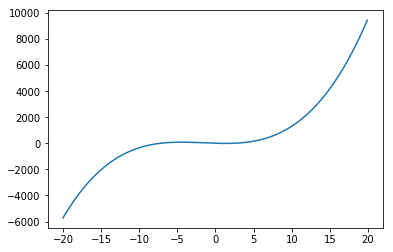

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array(np.arange(-20, 20, step=0.1))
y = (x**3) + (4.81 * x**2) - (17.37 * x) + 5.38
plt.plot(x, y)
plt.show()